<a href="https://colab.research.google.com/github/rainaa0277/Footwear-classification-using-CNN/blob/main/Footwear%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective : Slippers vs Sandals vs Boots Classification using CNN**

Steps:
1. Importing (or installing) Tensorflow version 2.0.0, Keras and other packages on your system
2. Loading data from disk
3. Data Preprocessing
4. Creating training and testing splits
5. Defining CNN model architecture 
6. Compiling your CNN model
7. Adding checkpoint and callbacks
8. Training your model on your training data
9. Evaluating your model on your test data
10. Generate Plots for accuracy and validation loss
11. Saving The train model
12. Making predictions using your trained CNN tensorflow model

In [ ]:
import tensorflow as tf
# !pip install tensorflow==2.0.0

In [ ]:
print(tf.__version__)

2.0.0


STEP1 - IMPORTING ALL THE PACKAGES

In [ ]:
# import the necessary packages
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import time
warnings.filterwarnings("ignore")

2. Loading data from disk

In [ ]:
# As our dataset is on our googl drive, hence mount the drive with the collaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Swicth to the current working directory where we need to build our model

os.chdir("/content/drive/MyDrive/Deep Learning/Practice CNN/Deep Learning Exam 1 - CNN")

In [ ]:
# Check the contents of the drive

!dir

CNN\ Classification\ by\ Rishab\ Raina\ (exam1).ipynb
my_logs.csv
test
Train
Weights-001--0.31853.hdf5
Weights-001--0.39194.hdf5
Weights-001--0.79344.hdf5
Weights-002--0.28045.hdf5
Weights-002--0.29861.hdf5
Weights-002--0.40801.hdf5
Weights-003--0.26063.hdf5
Weights-003--0.32053.hdf5
Weights-004--0.21011.hdf5
Weights-004--0.24510.hdf5
Weights-004--0.26057.hdf5
Weights-005--0.18274.hdf5
Weights-006--0.17786.hdf5
Weights-006--0.18087.hdf5
Weights-008--0.17499.hdf5
Weights-008--0.18490.hdf5
Weights-009--0.14960.hdf5
Weights-009--0.16206.hdf5
Weights-013--0.16725.hdf5
Weights-014--0.15962.hdf5
Weights-016--0.15288.hdf5


In [ ]:
# As the data contains images, hence we will import the path of the images
image_paths = list(paths.list_images("Train"))
image_paths[:10]

['Train/Slippers/slippers (141).jpg',
 'Train/Slippers/slippers (142).jpg',
 'Train/Slippers/slippers (137).jpg',
 'Train/Slippers/slippers (146).jpg',
 'Train/Slippers/slippers (111).jpg',
 'Train/Slippers/slippers (133).jpg',
 'Train/Slippers/slippers (118).jpg',
 'Train/Slippers/slippers (114).jpg',
 'Train/Slippers/slippers (125).jpg',
 'Train/Slippers/slippers (144).jpg']

In [ ]:
# start the clock to check time taken for the dataset to load loop to execute 
tic= time.time()

# initialize the data and labels
data = []
labels = []

# grab the image paths and randomly shuffle them
random.shuffle(image_paths)

# progress bar 
with tqdm(total = len(image_paths)) as pbar:

    # loop over the input images
    for image_path in image_paths:
        # load the image, resize the image to be 40x40 pixels (ignoring aspect ratio), 
        # flatten the 40x40x3=4800 pixel image into a list, and store the image in the data list
        image = cv2.imread(image_path)
        image = cv2.resize(image,(40,40))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = image_path.split(os.path.sep)[-2]

        if label == "Slippers":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label =="Boots":
            label = 2
        
        labels.append(label)

        # update the progressbar
        pbar.update(1)

toc = time.time()
print("The total time taken: {:.2f}sec".format(toc-tic))
print("Done")

  0%|          | 0/778 [00:00<?, ?it/s]

The total time taken: 4.06sec
Done


In [ ]:
# scale the raw pixel intensities to the range [0, 1] Preprocessing
data = np.array(data)/255.0
labels = np.array(labels)

**LABEL 0 =  SLIPPERS**

**LABEL 1 = SANDALS**

**LABEL 2 = BOOTS**

The label is 1


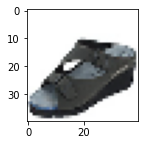

In [ ]:
#Plot a sample image to check if the classification is happening correctly
plt.figure(figsize=(2,3))
plt.imshow((data[5]*255).astype("int"))
print("The label is {}".format(labels[5]))
plt.show()

STEP4 : Creating training and testing splits

In [ ]:
# partition the data into 80% training and 20% validation
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

print(X_train.shape,"X_train")
print(y_train.shape,"y_train")
print(X_test.shape, "X_test")
print(y_test.shape, "y_test")

(622, 40, 40, 3) X_train
(622,) y_train
(156, 40, 40, 3) X_test
(156,) y_test


5. Defining CNN model architecture 

In [ ]:
# initialize the model
cnn = Sequential()

# first set of CONV => RELU => POOL layers
cnn.add(Conv2D(20, (5,5), padding="same", input_shape=(40,40,3)))
cnn.add(Activation("relu"))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# second set of CONV
cnn.add(Conv2D(50,(5,5), padding="same"))
# second set of RELU
cnn.add(Activation("relu"))
#second set of pooling layers
cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# first (and only) set of Fully Connected => RELU layers
cnn.add(Flatten())
cnn.add(Dense(500))
cnn.add(Activation("relu"))

# softmax classifier
cnn.add(Dense(units=3))
cnn.add(Activation("softmax"))

6. Compiling your CNN model

In [ ]:
# Compiling and Performing back propagation
print("[INFO] compiling model...")

EPOCHS = 120
INIT_LR = 0.001
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")

[INFO] compiling model...
[INFO] model complied...


Step7: ADDING CHECKPOINT AND CALLBACKS

In [ ]:
#Adding checkpoint and monitoring weight and validation loss
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

#Defining early stop so that if the val loss does not change to 20 iterations, Stop the iterations
# early_stop = EarlyStopping(monitor="val_loss", patience=20, verbose=1)

#CSV logger will save the accuracy , loss, val loss in csv format
log_csv = CSVLogger("my_logs.csv", separator=",")

#Adding callbacks to list
callbacks_list = [checkpoint, log_csv]

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 40, 20)        1520      
_________________________________________________________________
activation (Activation)      (None, 40, 40, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0

8. Training your model on your training data

In [ ]:
# train the neural network on training data set and validate on the text set
# batch_size (32) controls the size of each group of data to pass through the network. 
model = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= EPOCHS, batch_size=BS,callbacks=callbacks_list)

Train on 622 samples, validate on 156 samples
Epoch 1/120
608/622 [============================>.] - ETA: 0s - loss: 0.7639 - accuracy: 0.7007
Epoch 00001: val_loss improved from inf to 0.50654, saving model to Weights-001--0.50654.hdf5
622/622 [==============================] - 7s 11ms/sample - loss: 0.7568 - accuracy: 0.7042 - val_loss: 0.5065 - val_accuracy: 0.8269
Epoch 2/120
608/622 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8750
Epoch 00002: val_loss improved from 0.50654 to 0.40853, saving model to Weights-002--0.40853.hdf5
622/622 [==============================] - 5s 7ms/sample - loss: 0.3394 - accuracy: 0.8746 - val_loss: 0.4085 - val_accuracy: 0.8397
Epoch 3/120
608/622 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0.9161
Epoch 00003: val_loss improved from 0.40853 to 0.37419, saving model to Weights-003--0.37419.hdf5
622/622 [==============================] - 4s 7ms/sample - loss: 0.2085 - accuracy: 0.9164 - val_loss: 0.3

9. Evaluating your model on your test data

In [ ]:
#Evaluate the network
y_pred = cnn.predict(X_test)

In [ ]:
# Argmax will classify the classes which has the highest probability 
y_pred = [np.argmax(i) for i in y_pred]

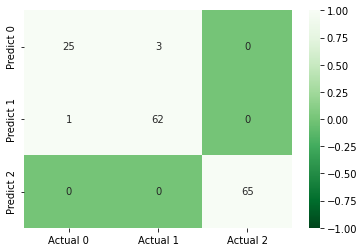

In [ ]:
#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(data=cm, columns=["Actual 0","Actual 1","Actual 2"], index = ["Predict 0","Predict 1", "Predict 2"])
sns.heatmap(data=matrix, vmin=-1, vmax=1, annot=True, cmap=plt.cm.Greens_r)
plt.show()

In [ ]:
#Plot classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.95      0.98      0.97        63
           2       1.00      1.00      1.00        65

    accuracy                           0.97       156
   macro avg       0.97      0.96      0.96       156
weighted avg       0.97      0.97      0.97       156



In [ ]:
cnn_accuracy = accuracy_score(y_test, y_pred)
print(f"The Model Accuracy = {cnn_accuracy*100:.2f}%")

The Model Accuracy = 97.44%


10. Generate Plots for accuracy and validation loss

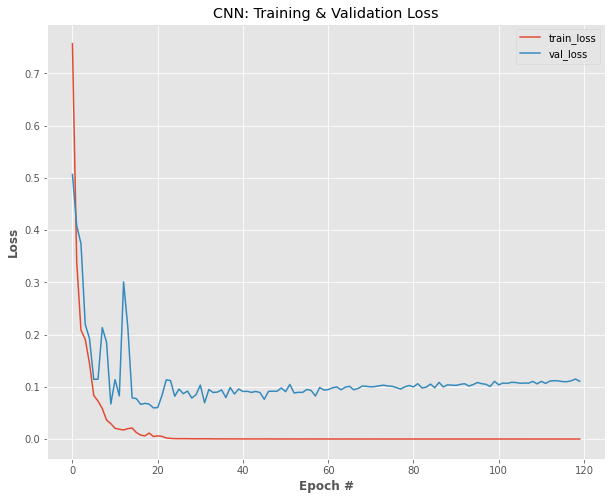

In [ ]:
# plot the training and validation loss
N = np.arange(0, 120)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, model.history["loss"], label="train_loss")
plt.plot(N, model.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

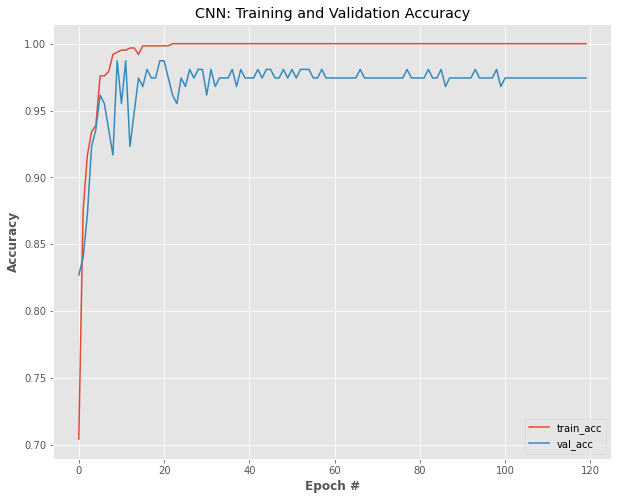

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, 120)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, model.history["accuracy"], label="train_acc")
plt.plot(N, model.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

11. Saving The train model

In [ ]:
cnn.save('classification_using_cnn.h5')

12. Making predictions using your trained CNN tensorflow model

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

[INFO] loading network and...


  0%|          | 0/89 [00:00<?, ?it/s]

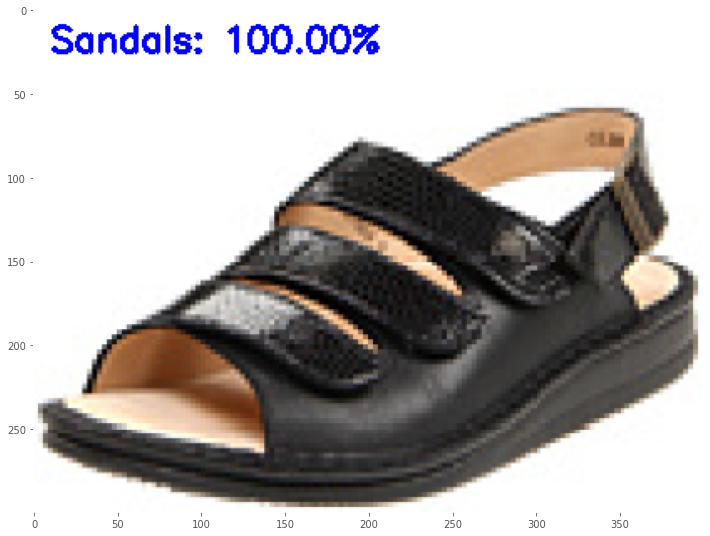

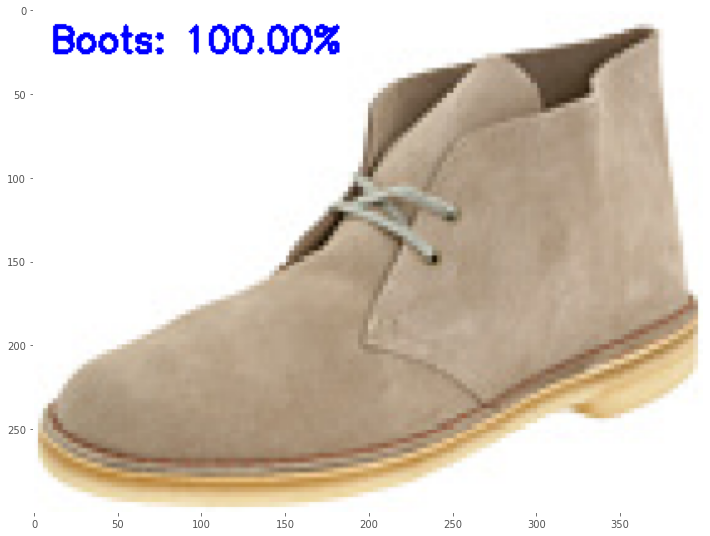

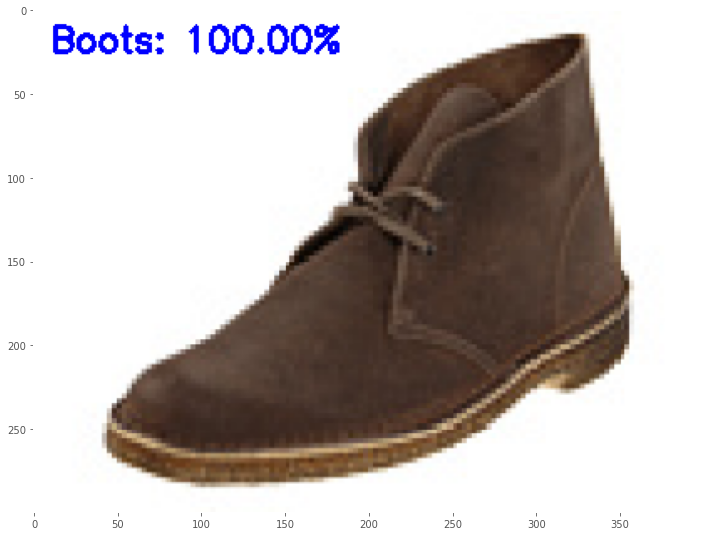

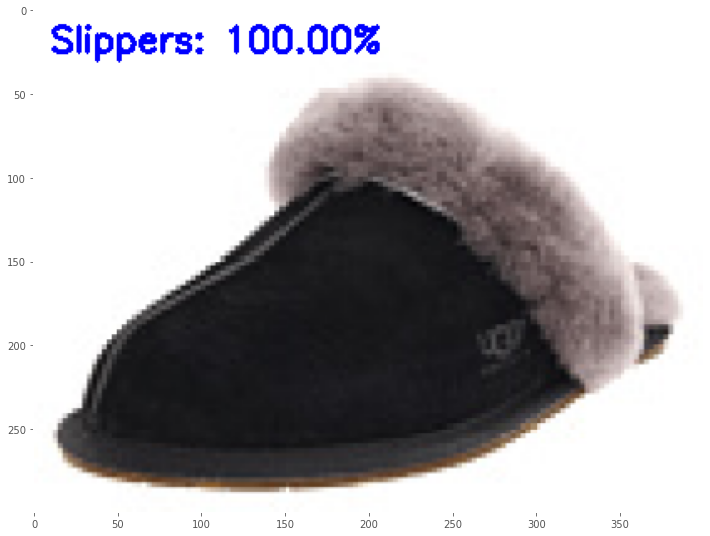

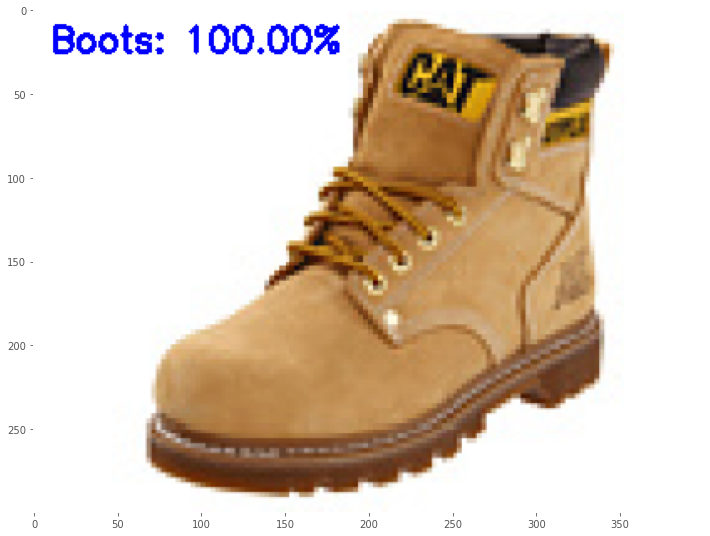

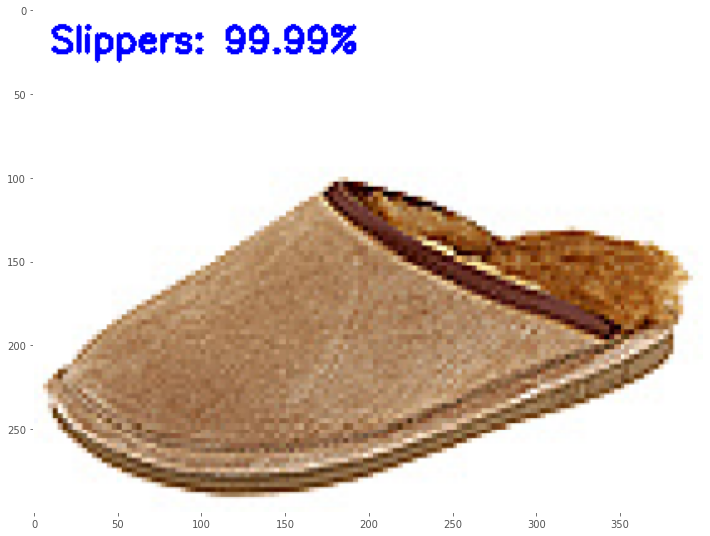

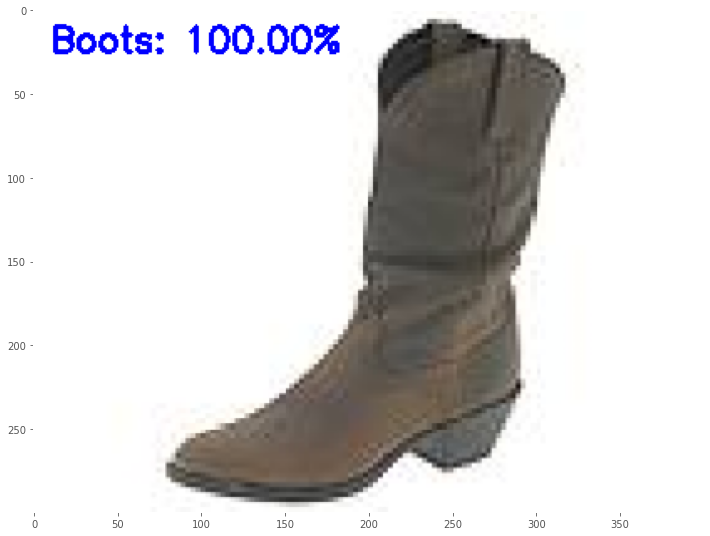

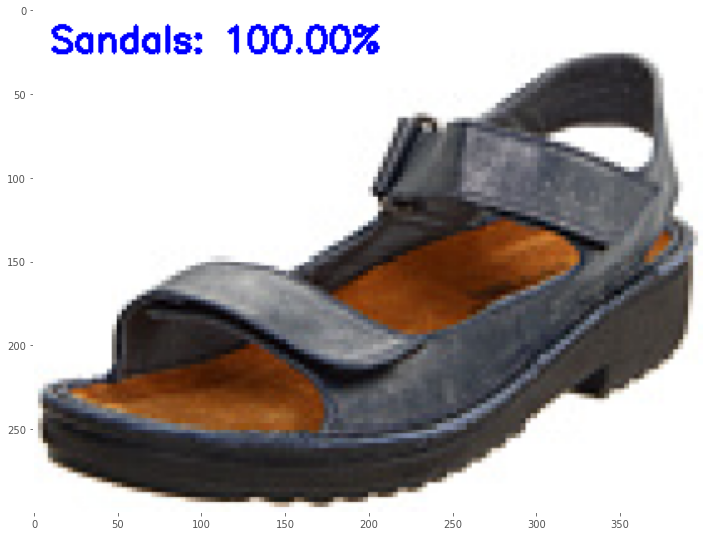

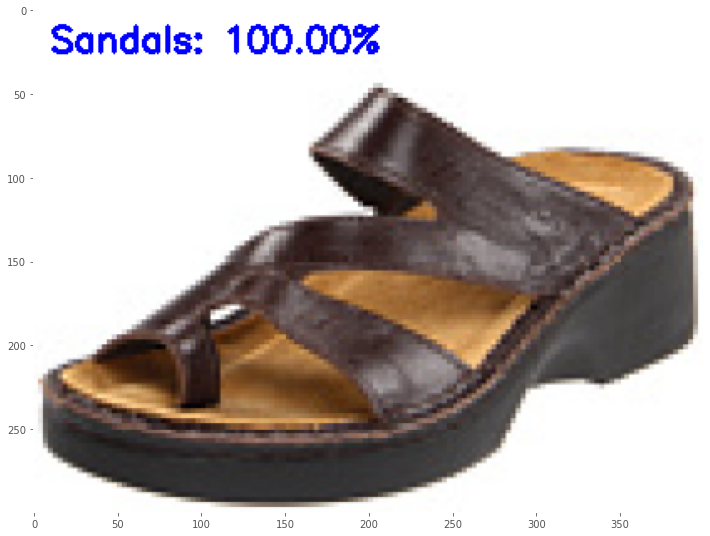

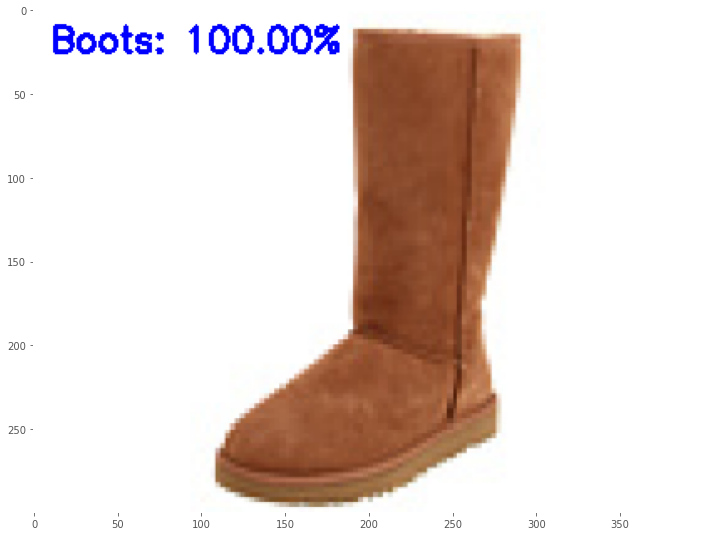

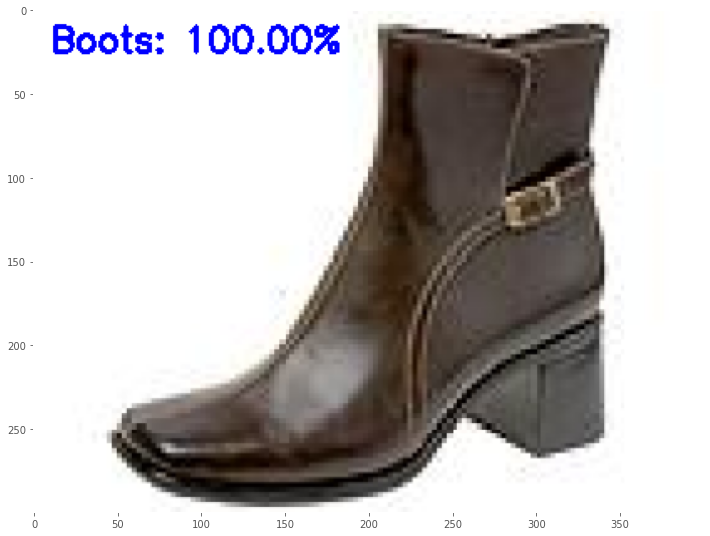

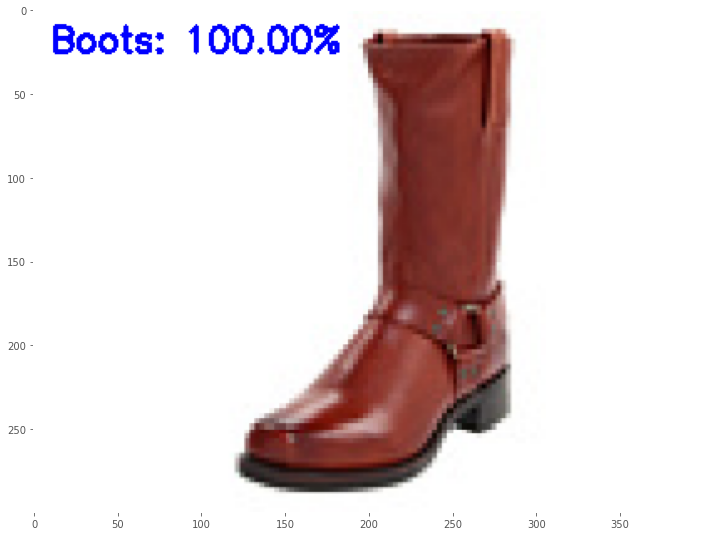

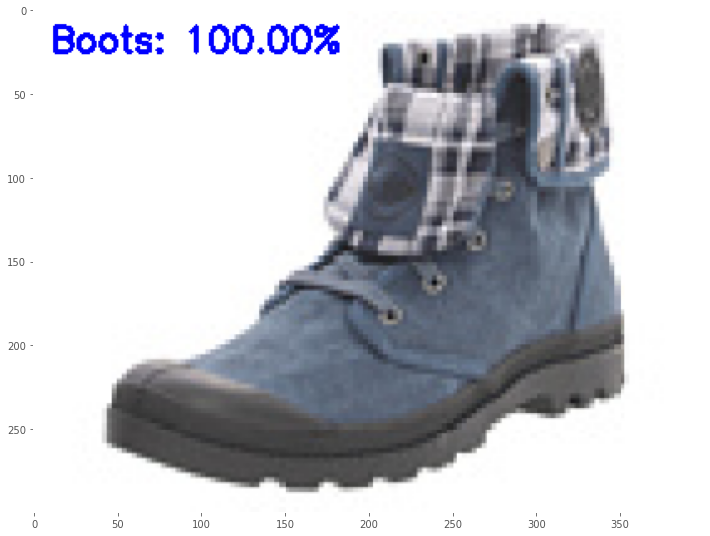

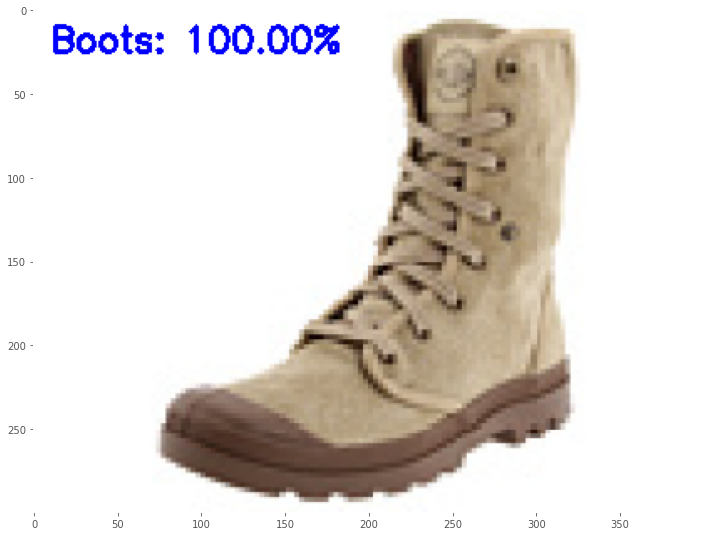

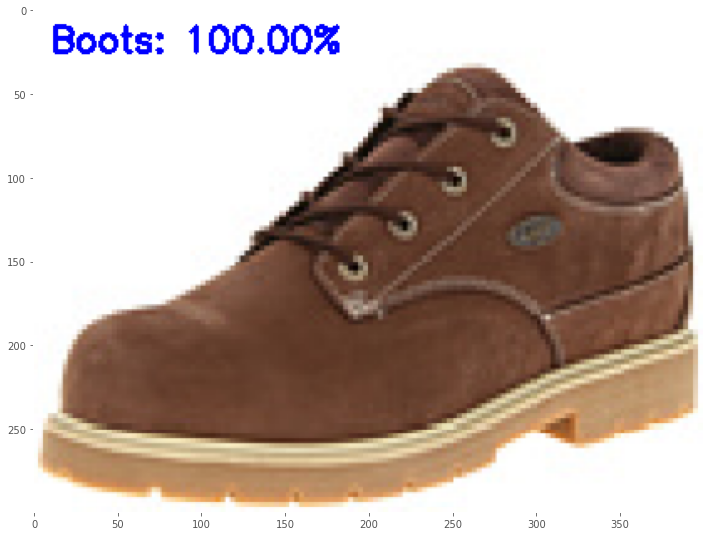

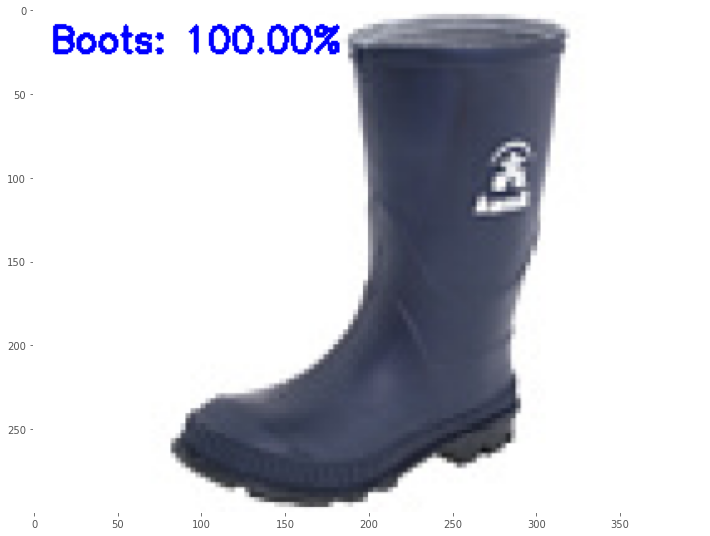

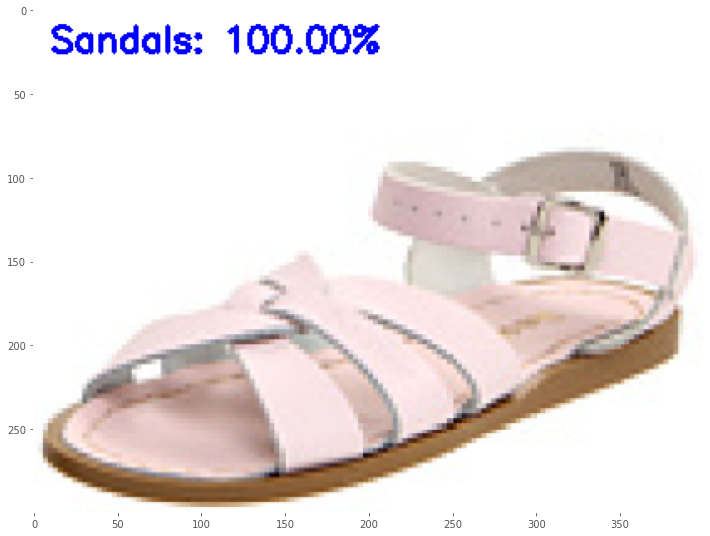

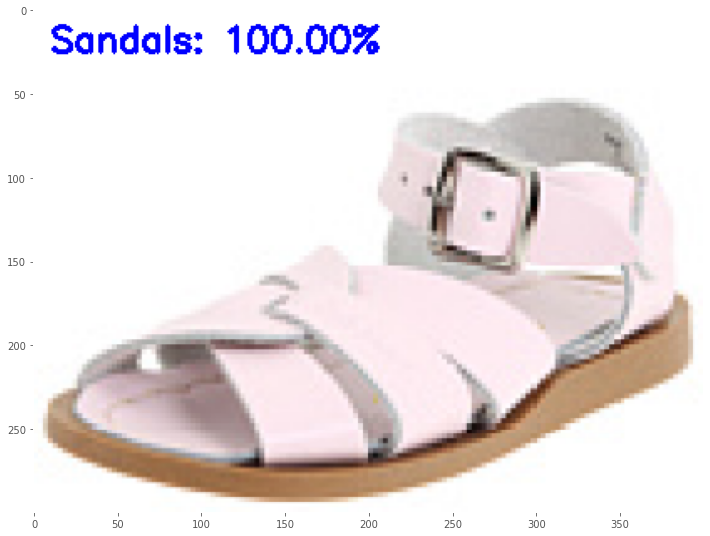

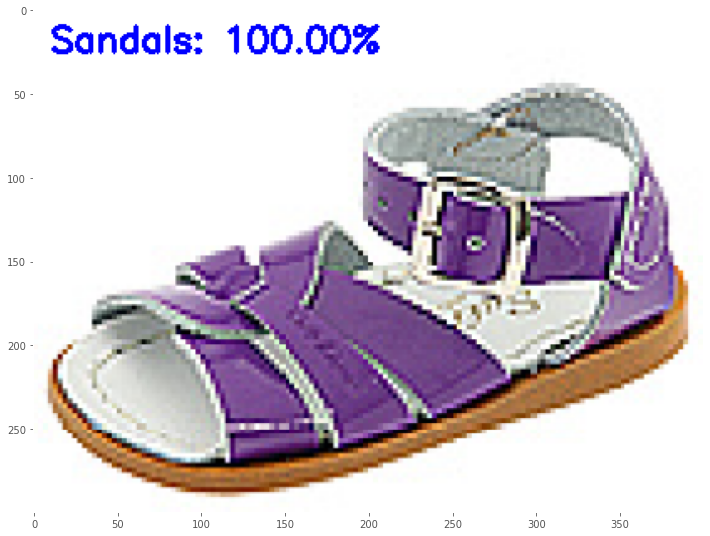

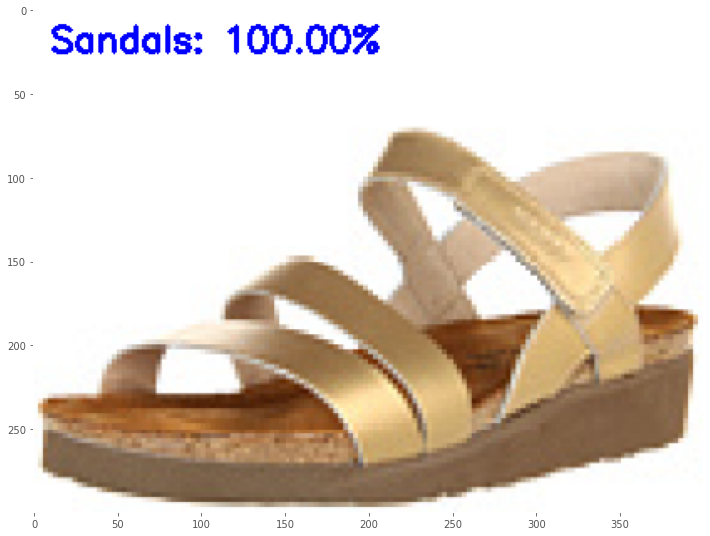

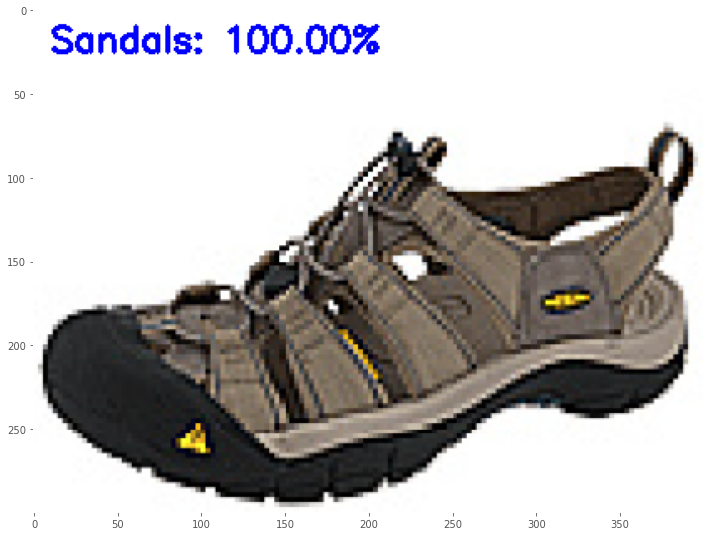

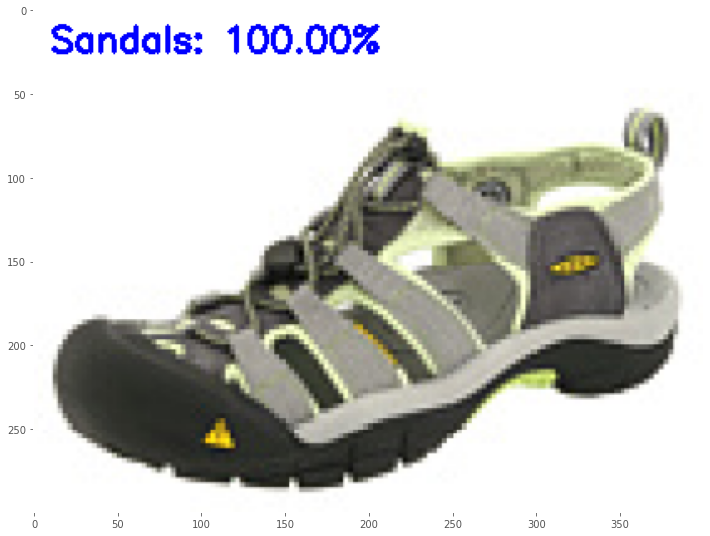

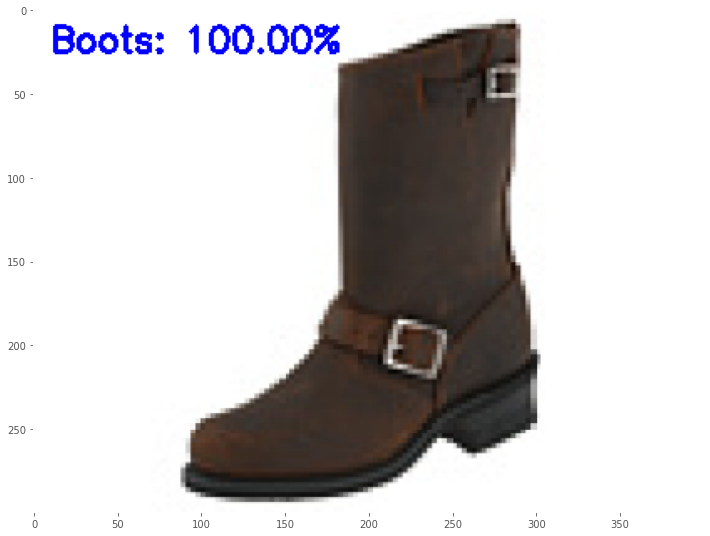

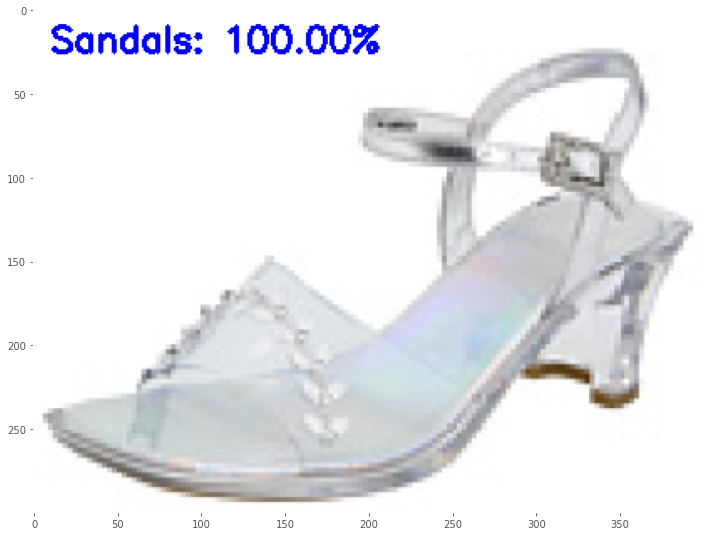

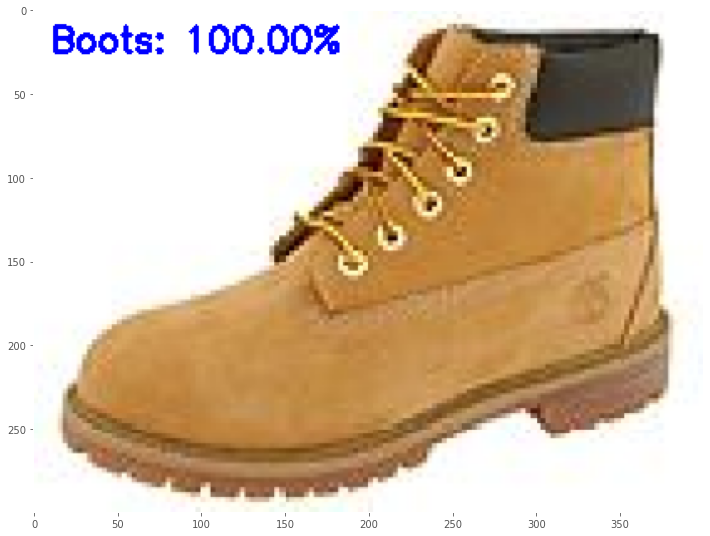

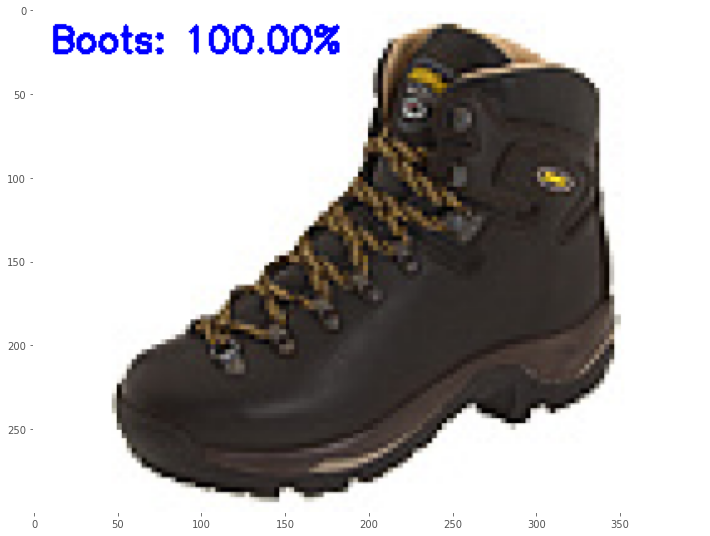

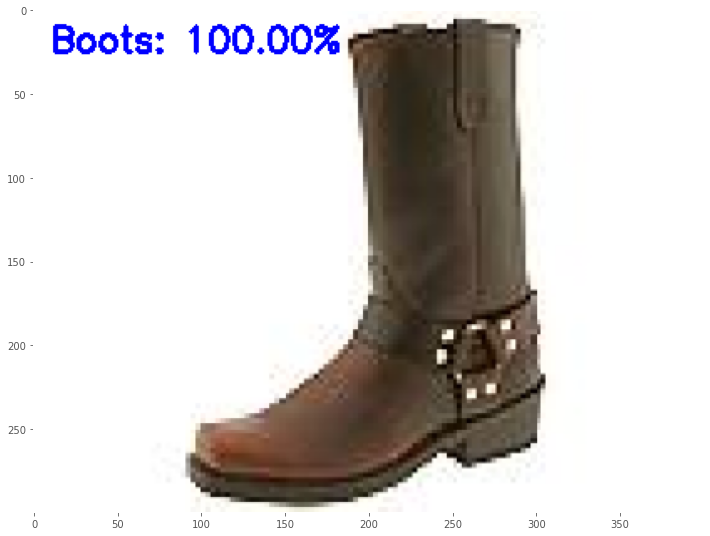

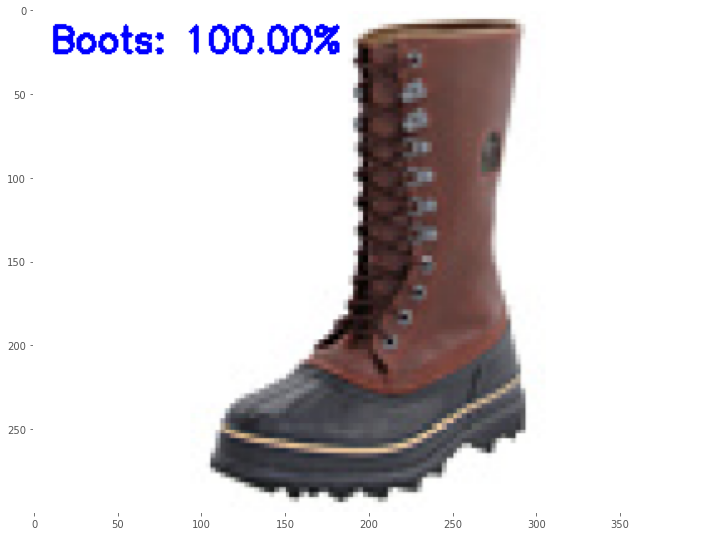

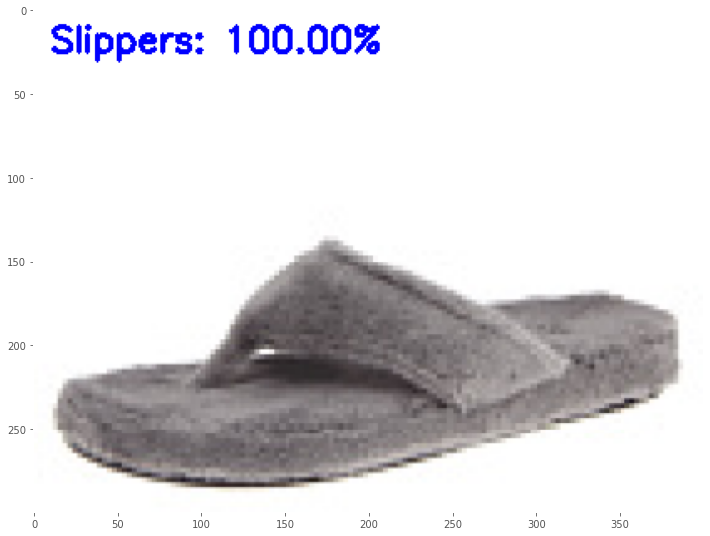

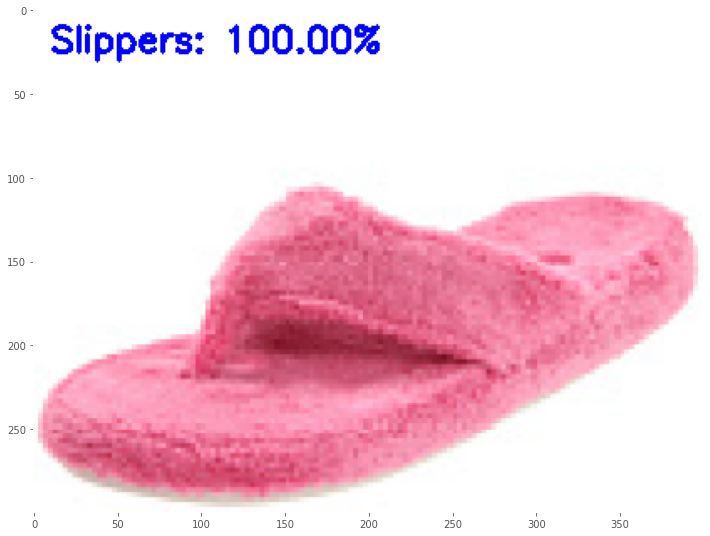

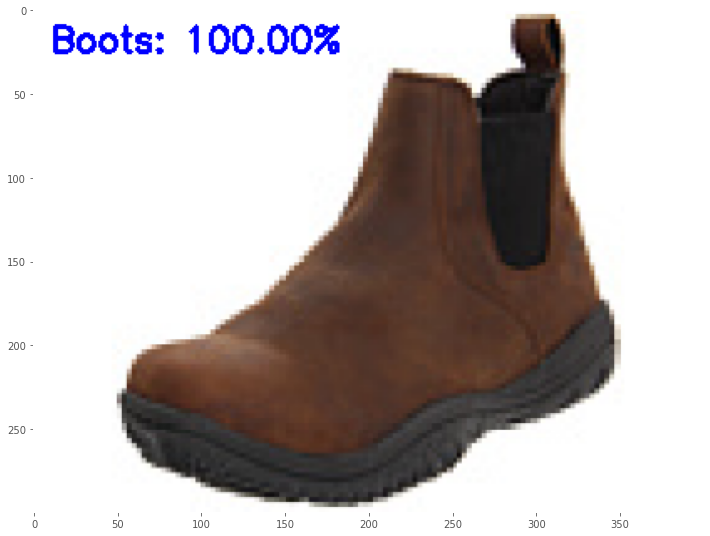

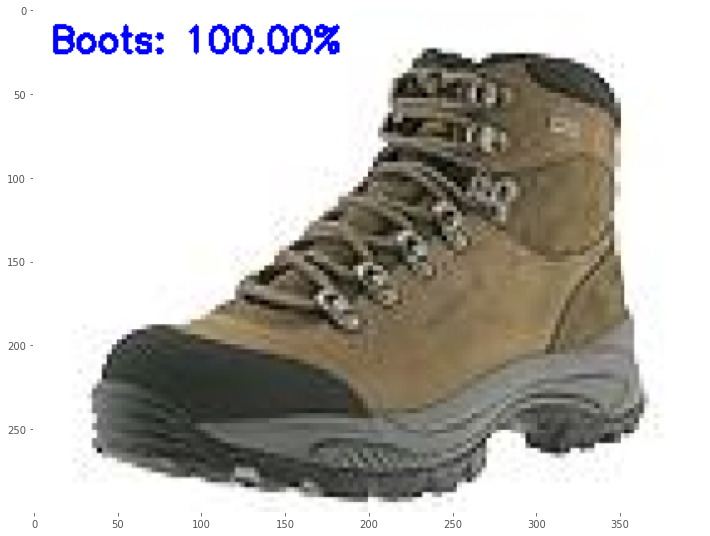

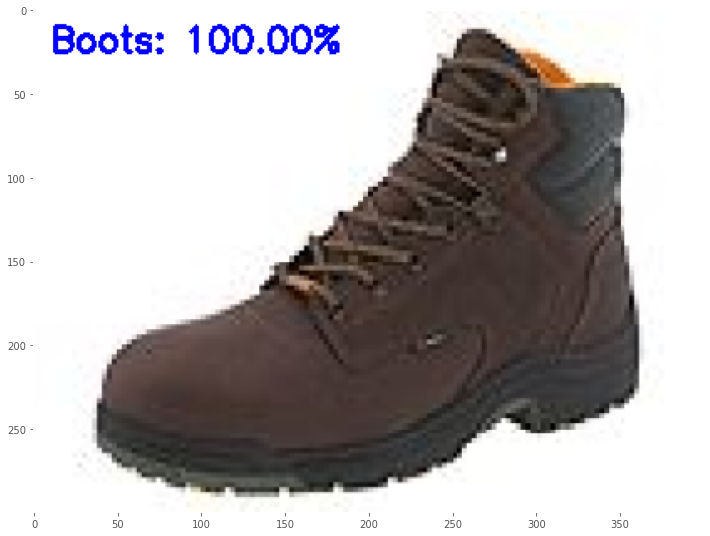

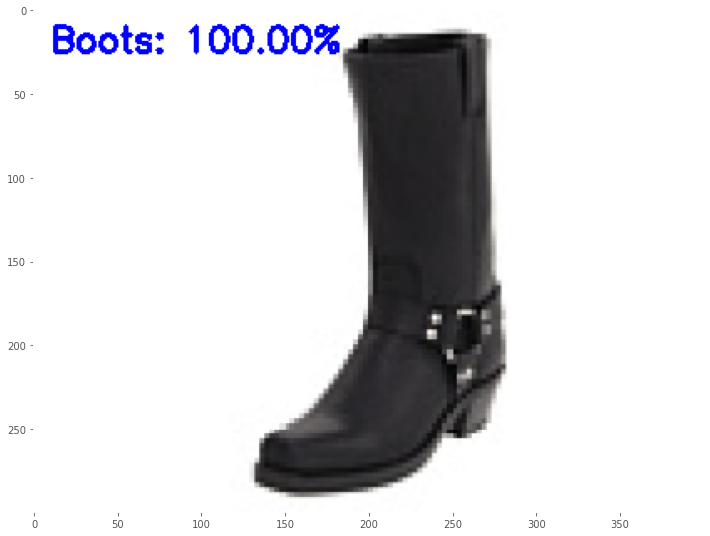

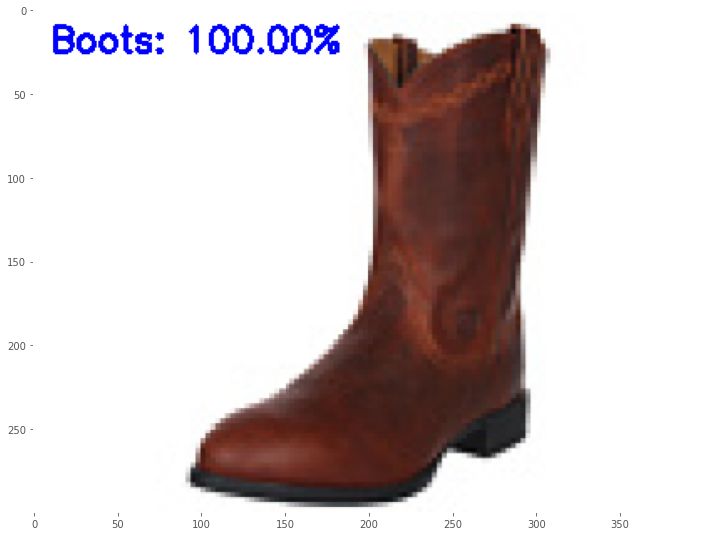

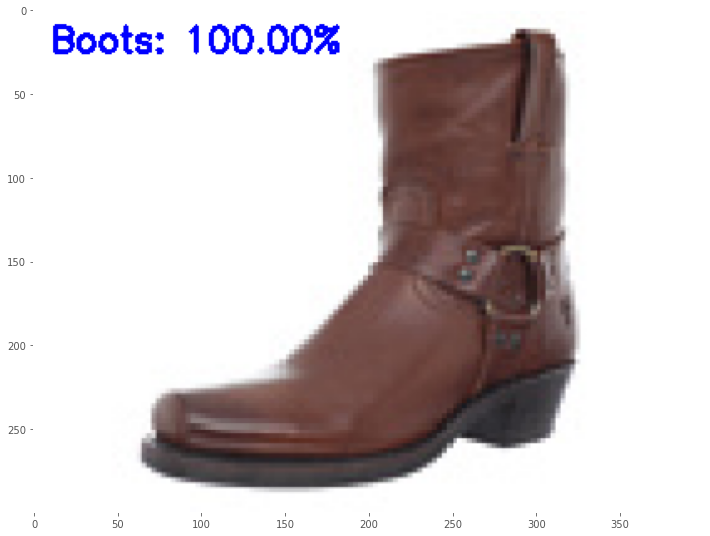

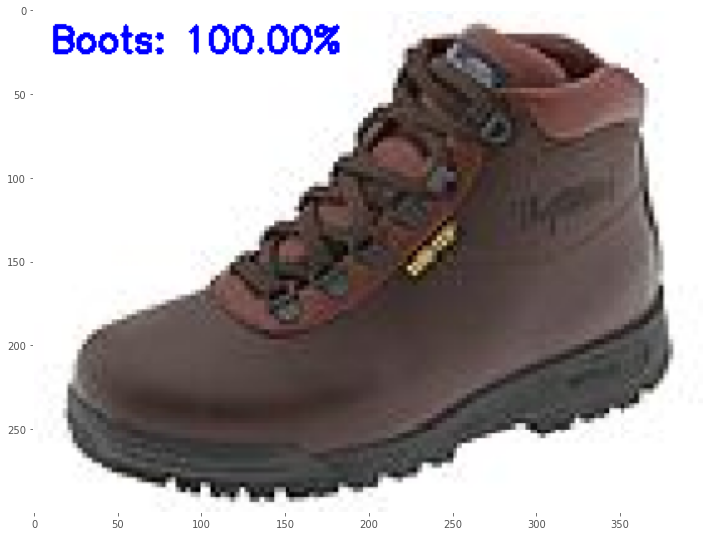

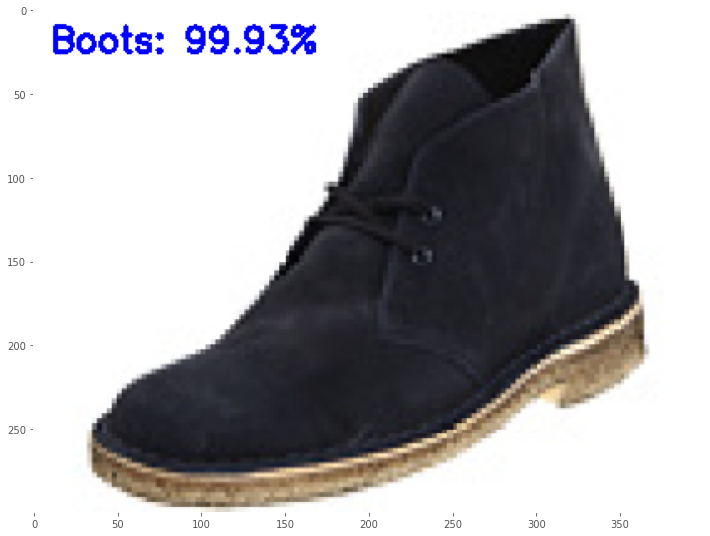

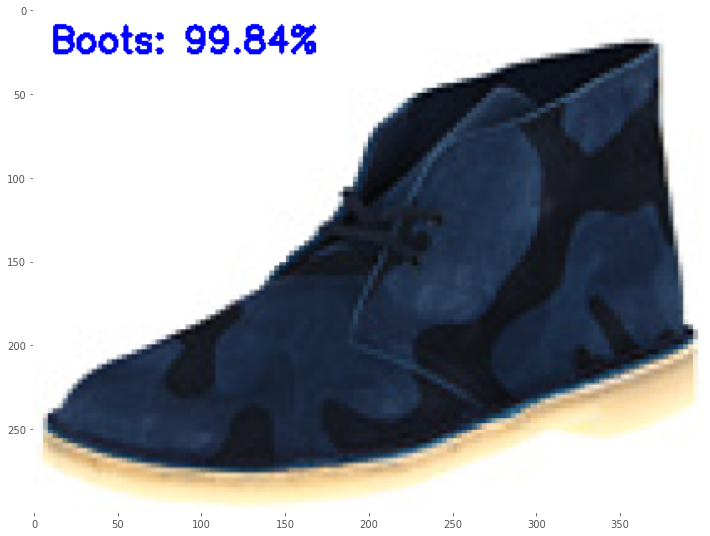

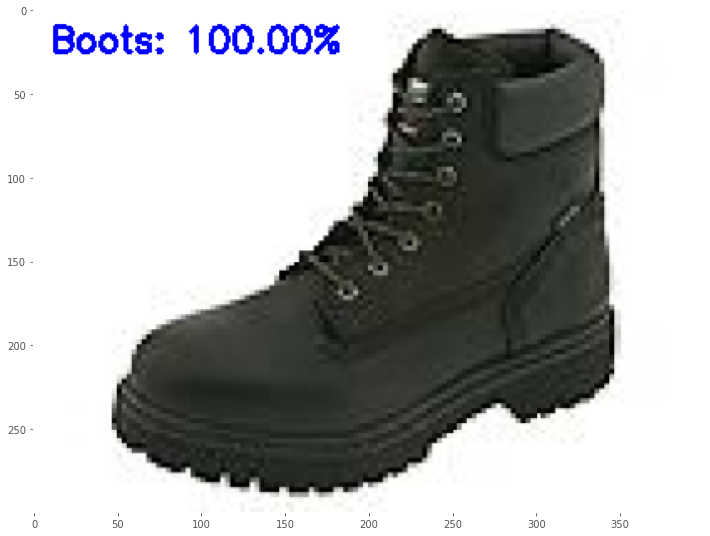

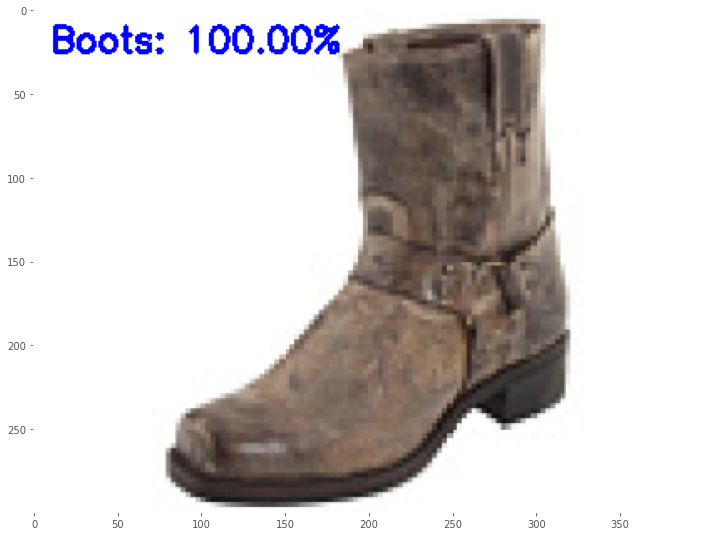

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Slippers", "Sandals", "Boots"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (40, 40))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = cnn.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Conclusion:

1. The model accuracy is approx 97%.
2. We can conclude that our model is able to predict :
        a) 0th Class(Slippers) with 93% accuracy
        b) 1st Class(Sandals) with 97% accuracy
        c) 2nd Class(Boots) with 100% accuracy

          Labels      precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.95      0.98      0.97        63
           2       1.00      1.00      1.00        65
3. The model on the unseen data is also performing good using the Conv2D architecture.
4. On the test data, model is able to classify the images correctly.
5. With the help of CSV logger we can keep a track of the val accuracy, loss.
6. Doing some more trickery, the model can be used for deployment purposes.
